## 0. Import relevant Dependencies

Incase you are getting any error saying the package is not installed while running the below cell, then you can use two methods:
- pip install ________.
- google 'How to install ________'.

In [1]:
# Import Dependencies -To see the graphs in the notebook.
%matplotlib inline   

# Python Imports
import math,time,random,datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization -This is where the graphs come in.
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
plt.style.use('ggplot')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model

from scipy import stats
from scipy.stats import norm,skew

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the data.
df = pd.read_csv('zomato.csv')

In [3]:
# Viewing the launch dataset
pd.set_option('display.max_columns', None)
df.head()

,url,Restaurant_Name,Online,Booking,Rating,Location,Cuisines,Price,Restaurant_Type
0,https://www.zomato.com/fatsos?context=eyJzZSI6...,Fatso's,Yes,No,3.8 /5,Brigade Road,"Cafe, American, Italian, Burger",650,Cafes
1,https://www.zomato.com/bangalore/biriyaniz-hsr...,Biriyaniz,Yes,No,3.5/5,HSR,"Biryani, North Indian, Chinese, Andhra",400,Delivery
2,https://www.zomato.com/bangalore/2443-the-oter...,24@43 - The Oterra,No,Yes,4.1/5,Electronic City,"North Indian, Asian, Continental","3,000",Dine-out
3,https://www.zomato.com/bangalore/upahara-bhava...,Upahara Bhavan,Yes,No,3.8/5,Bannerghatta Road,"South Indian, North Indian, Chinese",300,Delivery
4,https://www.zomato.com/bangalore/ross-kitchen-...,Ross Kitchen,Yes,No,3.6/5,BTM,Chinese,400,Delivery


In [4]:
print("Dimensionality of the Zomato dataset: ", df.shape)

Dimensionality of the Zomato dataset:  (28444, 9)


- So from this we understand that there are a total of 28444 rows and 9 columns in our dataset.

## 2. Data Cleaning

Data cleaning is a extremely important procedure as most our models will not run if our data is not of the correct type or in the correct format.

- Here we going to go through and basically clean it up so we can use it in our exploratory data analysis as well as in our model building.

1. Checking if the url's have been repeated (Dropping if there are any duplicates)

In [5]:
df = df.drop_duplicates('url')

In [6]:
print("Dimensionality of the Zomato dataset: ", df.shape)

Dimensionality of the Zomato dataset:  (28444, 9)


- Here we can see that there were no duplicated url's. Now we can continue with our analysis.

2. Remove the 'url' column (Not required for further analysis)

In [7]:
df.drop("url", axis=1, inplace=True)
df.head()

,Restaurant_Name,Online,Booking,Rating,Location,Cuisines,Price,Restaurant_Type
0,Fatso's,Yes,No,3.8 /5,Brigade Road,"Cafe, American, Italian, Burger",650,Cafes
1,Biriyaniz,Yes,No,3.5/5,HSR,"Biryani, North Indian, Chinese, Andhra",400,Delivery
2,24@43 - The Oterra,No,Yes,4.1/5,Electronic City,"North Indian, Asian, Continental","3,000",Dine-out
3,Upahara Bhavan,Yes,No,3.8/5,Bannerghatta Road,"South Indian, North Indian, Chinese",300,Delivery
4,Ross Kitchen,Yes,No,3.6/5,BTM,Chinese,400,Delivery


3. Cleaning "Rating" Column

    - What we will be doing here is remove all the "/5".

In [8]:
df['Rating'].unique()

array(['3.8 /5', '3.5/5', '4.1/5', '3.8/5', '3.6/5', '4.0/5', '3.6 /5',
       '3.4 /5', '4.1 /5', '2.8/5', '3.2/5', '3.0 /5', '3.2 /5', '4.2/5',
       nan, '3.4/5', '3.7/5', '3.3/5', '3.9 /5', '3.7 /5', 'NEW', '2.9/5',
       '3.1/5', '2.7/5', '2.6 /5', '4.3 /5', '4.0 /5', '2.5 /5', '4.4 /5',
       '3.9/5', '2.9 /5', '4.2 /5', '4.7/5', '3.3 /5', '4.5 /5', '-',
       '3.1 /5', '2.6/5', '4.5/5', '4.3/5', '3.5 /5', '2.8 /5', '4.6 /5',
       '2.7 /5', '4.6/5', '4.4/5', '3.0/5', '2.4/5', '2.4 /5', '4.9/5',
       '4.8 /5', '2.1/5', '4.9 /5', '4.7 /5', '2.2/5', '1.8 /5', '2.3 /5',
       '2.5/5', '4.8/5', '1.8/5', '2.3/5', '2.2 /5', '2.1 /5', '2.0/5',
       '2.0 /5'], dtype=object)

- Here we can see that there are values like "NEW", "-" and nan. The nan will create issues while cleaning, so what we can do is fill it up with 0, then convert all the rows containing this with NaN values.

In [9]:
df['Rating'].fillna('0', inplace= True)

In [10]:
df['Rating'] = df['Rating'].apply(lambda x: x.split('/')[0] if '/' in x else np.nan).astype(float)

In [11]:
df.head()

,Restaurant_Name,Online,Booking,Rating,Location,Cuisines,Price,Restaurant_Type
0,Fatso's,Yes,No,3.8,Brigade Road,"Cafe, American, Italian, Burger",650,Cafes
1,Biriyaniz,Yes,No,3.5,HSR,"Biryani, North Indian, Chinese, Andhra",400,Delivery
2,24@43 - The Oterra,No,Yes,4.1,Electronic City,"North Indian, Asian, Continental","3,000",Dine-out
3,Upahara Bhavan,Yes,No,3.8,Bannerghatta Road,"South Indian, North Indian, Chinese",300,Delivery
4,Ross Kitchen,Yes,No,3.6,BTM,Chinese,400,Delivery


In [12]:
# Removing all the rows that have the null values in our Rating Feature.
df.dropna(subset= ['Rating'], inplace= True)
df.head()

,Restaurant_Name,Online,Booking,Rating,Location,Cuisines,Price,Restaurant_Type
0,Fatso's,Yes,No,3.8,Brigade Road,"Cafe, American, Italian, Burger",650,Cafes
1,Biriyaniz,Yes,No,3.5,HSR,"Biryani, North Indian, Chinese, Andhra",400,Delivery
2,24@43 - The Oterra,No,Yes,4.1,Electronic City,"North Indian, Asian, Continental","3,000",Dine-out
3,Upahara Bhavan,Yes,No,3.8,Bannerghatta Road,"South Indian, North Indian, Chinese",300,Delivery
4,Ross Kitchen,Yes,No,3.6,BTM,Chinese,400,Delivery


4. Cleaning "Price" Column

    - We can see that there are ','s which is why this column is an object. So we will be removing these and converting them to integers.

In [13]:
df['Price'].isna().any()
print('There are a total of: ',df["Price"].isna().sum(), ' NULL values.')

There are a total of:  132  NULL values.


- Here we can see that there are null values for our Target variable. This can be a issue as we are dealing with a real world data. So what we will be doing here is we will try to fill this column with the **Mean/Median** Price of the location.

    - **The same could not be done for the "Rating" column as rating depends on the interest of customers. Whereas the price can be dependent on the location.**

#### Removing the commas from the 'Price' column, and converting them to 'int' type.

In [14]:
## First we will convert all the NULL values to '0'.
df['Price'].fillna('0', inplace= True)

In [15]:
df['Price'] = df['Price'].apply(lambda x: x.replace(',','') if ',' in x else x).astype(int)

In [16]:
## Here we will be converting all the Restaurants who have their Price as 0 to NULL values.
df['Price'].replace(0,np.nan, inplace= True)

In [17]:
df.head()

,Restaurant_Name,Online,Booking,Rating,Location,Cuisines,Price,Restaurant_Type
0,Fatso's,Yes,No,3.8,Brigade Road,"Cafe, American, Italian, Burger",650.0,Cafes
1,Biriyaniz,Yes,No,3.5,HSR,"Biryani, North Indian, Chinese, Andhra",400.0,Delivery
2,24@43 - The Oterra,No,Yes,4.1,Electronic City,"North Indian, Asian, Continental",3000.0,Dine-out
3,Upahara Bhavan,Yes,No,3.8,Bannerghatta Road,"South Indian, North Indian, Chinese",300.0,Delivery
4,Ross Kitchen,Yes,No,3.6,BTM,Chinese,400.0,Delivery


In [18]:
print("Dimensionality of the Zomato dataset after cleaning is: ", df.shape)

Dimensionality of the Zomato dataset after cleaning is:  (22938, 8)


- Now we can see that after our Data Cleaning process there is a total of 22938 rows and 8 columns in our dataset. Thus, we can say that this is our Final dataset in which we will be performing the **Exploratory Data Analysis**.

## 3. Exploratory Data Analysis

**PROBLEM:** To predict the approximate Price of each restaurant.


In [19]:
df.describe()

,Rating,Price
count,22938.000000,22806.000000
mean,3.701818,602.947338
std,0.439300,463.299326
min,1.800000,40.000000
25%,3.400000,300.000000
50%,3.700000,500.000000
75%,4.000000,700.000000
max,4.900000,5000.000000


In [20]:
df.describe(include = ['O']).T

,count,unique,top,freq
Restaurant_Name,22938,5911,Just Bake,45
Online,22938,2,Yes,15003
Booking,22938,2,No,19495
Location,22938,90,BTM,2118
Cuisines,22931,2208,North Indian,1221
Restaurant_Type,22938,7,Delivery,11393


> The .describe() method gives us summary statistics for numerical columns in our DataFrame. 

#### Insights so far

1. There are roughly 6000 different restaurant names, so it seems most of them are just same restaurants with different locations.
3. Most restaurants allow online ordering.
4. Most restaurants don't allow table booking.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22938 entries, 0 to 28443
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Restaurant_Name  22938 non-null  object 
 1   Online           22938 non-null  object 
 2   Booking          22938 non-null  object 
 3   Rating           22938 non-null  float64
 4   Location         22938 non-null  object 
 5   Cuisines         22931 non-null  object 
 6   Price            22806 non-null  float64
 7   Restaurant_Type  22938 non-null  object 
dtypes: float64(2), object(6)
memory usage: 1.6+ MB


> The .info() method allows us to learn the shape of object types of our data. 

### Missing Values

- In any dataset we will initially try to find out where the missing data are. Eventhough we know that there are missing values, we will try to visualize them.

<AxesSubplot:>

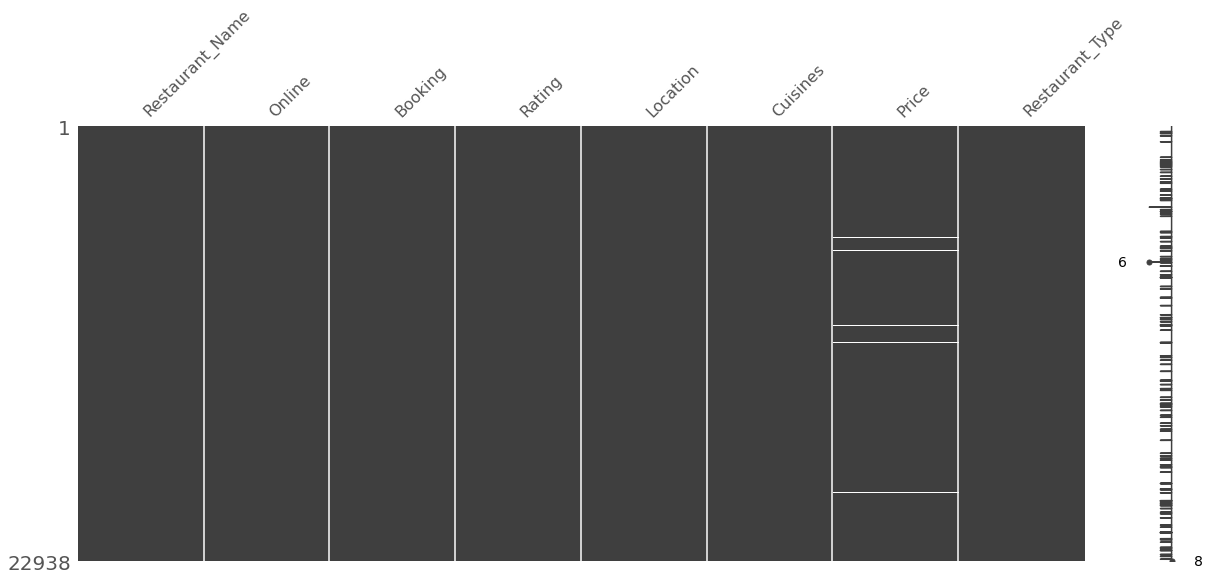

In [22]:
# To plot a graphic of missing values
missingno.matrix(df,figsize=(20,8))

- It is important to visualise missing values, because then you will know what are the major NaN values in your dataset.
- Here we can see that our 'Price' column has a few missing values. 

But it doesnt give us the full picture, so let's look more deeply into the columns to see how many missing values there are.

In [23]:
# Understanding more about the missing value columns

def missing_values_table(df):
    # number of missing values
    mis_val = df.isnull().sum()

    # % of missing values
    mis_val_percent = 100 * mis_val / len(df)

    # make table # axis '0' concat along index, '1' column
    mis_val_table = pd.concat([mis_val,mis_val_percent], axis= 1) 

    # rename columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0: 'Missing Values', 1: '% of Total Values'})

    # sort by column
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1]!= 0].sort_values(
        '% of Total Values', ascending= False).round(1) #Review
    print("Your selected dataset has " + str(df.shape[1]) + " columns and " + str(len(df)) + " observations.\n"
         "\n There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")
    
    # return the dataframe with missing info
    return mis_val_table_ren_columns

missing_values_table(df)

Your selected dataset has 8 columns and 22938 observations.

 There are 2 columns that have missing values.


,Missing Values,% of Total Values
Price,132,0.6
Cuisines,7,0.0


### What Datatypes are there in the dataframe?

We usually consider features with a datatype of object as categorical features. And those with float or int could be numerical features.

However, sometimes the features that we consider as numerical might actually turn out to be categorical.

The next few steps will help us figure out how to process our data so our machine learning model can learn from it.
Ideally all the features will be encoded into a numerical value of some kind (maybe 0 or 1 / something else).

In [24]:
# Datatypes in the dataset
df.dtypes

Restaurant_Name     object
Online              object
Booking             object
Rating             float64
Location            object
Cuisines            object
Price              float64
Restaurant_Type     object
dtype: object

**Analysis from the above code**

1. Here we can see that most of our columns are of object type. 
2. We can also see that the Price column is having a float datatype. This is because of the presence of NULL values. 

### Exploring each of these features 
We will go through each of the columns and see which all we can use in our first models. Some of them needs more preprocessing than the others to get ready.

### UNIVARIATE ANALYSIS

In [25]:
df.head()

,Restaurant_Name,Online,Booking,Rating,Location,Cuisines,Price,Restaurant_Type
0,Fatso's,Yes,No,3.8,Brigade Road,"Cafe, American, Italian, Burger",650.0,Cafes
1,Biriyaniz,Yes,No,3.5,HSR,"Biryani, North Indian, Chinese, Andhra",400.0,Delivery
2,24@43 - The Oterra,No,Yes,4.1,Electronic City,"North Indian, Asian, Continental",3000.0,Dine-out
3,Upahara Bhavan,Yes,No,3.8,Bannerghatta Road,"South Indian, North Indian, Chinese",300.0,Delivery
4,Ross Kitchen,Yes,No,3.6,BTM,Chinese,400.0,Delivery


#### FEATURE 1: Online
Description: Whether Online ordering is there or not.

Yes    15003
No      7935
Name: Online, dtype: int64


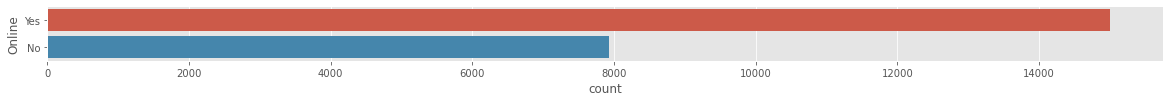

In [26]:
# How many restaurants have the option of Online services?
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Online',data= df)
#sns.countplot(x='Online',data=df)             --> You can use this to get a vertical graph.
 
print(df['Online'].value_counts())             ##This will help us see the exact number along with the graph.

- Here we can see that most of the restaurants provide oline services. This is very prominant and also a necessaty during this pandemic.

#### FEATURE 2: Booking
Description: Whether Booking a table is available or not.

No     19495
Yes     3443
Name: Booking, dtype: int64


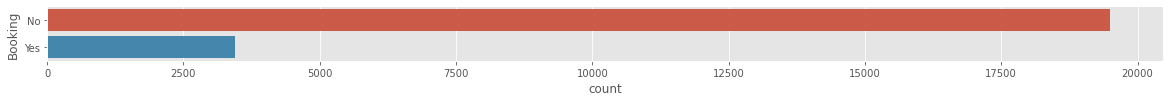

In [27]:
# How many restaurants have the option of Booking tables?
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Booking',data= df)
#sns.countplot(x='Booking',data=df)             --> You can use this to get a vertical graph.
 
print(df['Booking'].value_counts())             ##This will help us see the exact number along with the graph.

- Here we can see that a majority of the restaurants don't have the option of booking. This can be mainly because of the fact that the pandemic is going on, also that most of the restaurants are not that fancy that they need any prior booking.

#### FEATURE 3: Rating
Description: The Ratings provided by each restaurant.

In [28]:
# Are there any missing values?
df['Rating'].isnull().sum()

0

<AxesSubplot:>

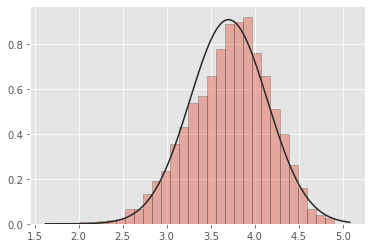

In [29]:
sns.distplot(x= df['Rating'], hist=True, kde= False, bins = 30, hist_kws={'edgecolor':'black'}, fit= norm)

- We can see here that most of the restaurants have a "Rating" in between 3.5 and 4.5. 
- In general, the rating distribution is not normal but in the highest score 3.9 has peak. 

We have to carefully see the condition of the highest rated restuarant.

#### FEATURE 4: Location
Description: The restaurant location.

In [30]:
# Are there any missing values?
df['Location'].isnull().any()

False

In [31]:
# Unique restaurants in Bangalore
df['Location'].nunique()

90

> We can see that there are a total of 90 restaurants. This is the same what we have seen in our initial step using the .describe() function.

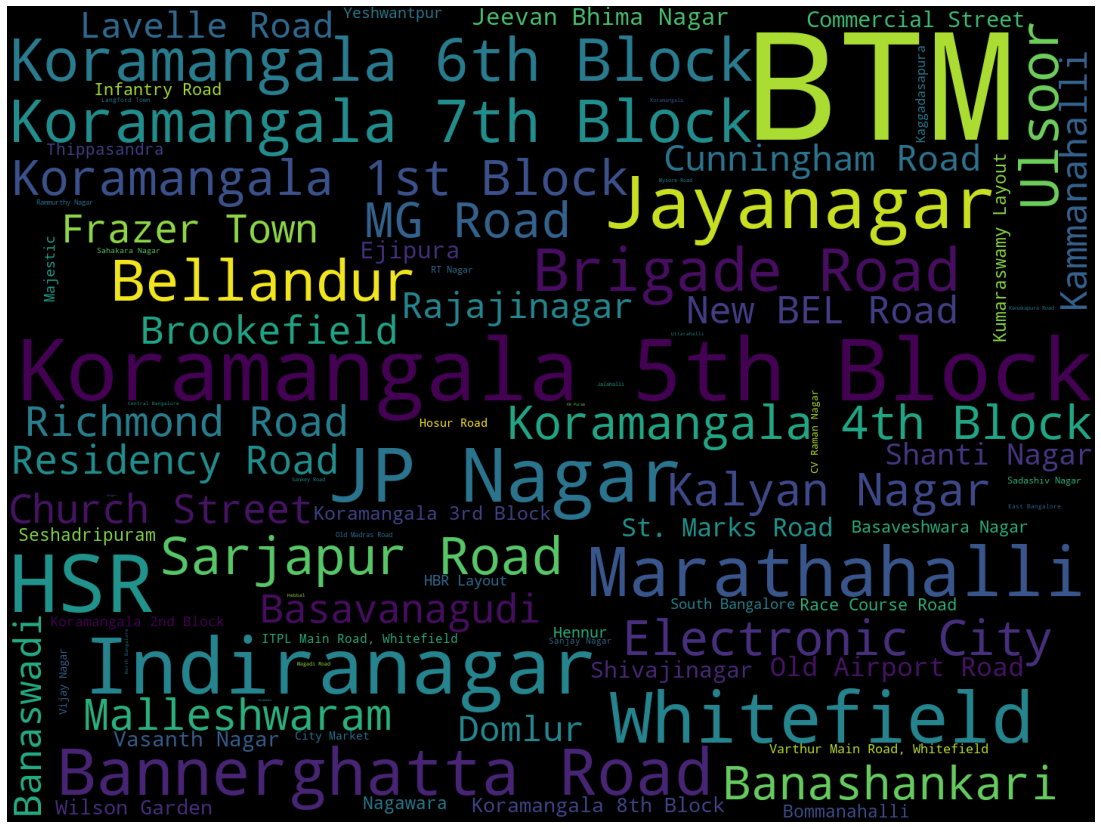

In [32]:
# To visualize the most frequent Locations in zomato app.
from subprocess import check_output
from wordcloud import WordCloud
wordcloud = (WordCloud(width=1440, height=1080, relative_scaling= 0.5).generate_from_frequencies(df['Location'].value_counts()))


fig = plt.figure(1,figsize=(25, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

- Clearly BTM has the most number of restaurants in Bengaluru, followed by Koramangala 5th Block.

#### FEATURE 5: Cuisines
Description: The cooking traditions and practices of a restaurant.

In [33]:
# Total missing values in this column
df['Cuisines'].isnull().sum()

7

In [34]:
# Unique Cuisines in Bangalore
len({x.strip(' ') for lis in df['Cuisines'].dropna() for x in lis.split(',')})

104

- There are 104 different types of cuisines. Now let's find out which one is is the most common

In [35]:
cuisines = pd.Series([x.strip(' ') for lis in df['Cuisines'].dropna() for x in lis.split(',')], name = 'Bangalore Cuisines')
cuisines.value_counts(ascending = False).head()

North Indian    9525
Chinese         7103
Fast Food       3525
South Indian    3515
Continental     2860
Name: Bangalore Cuisines, dtype: int64

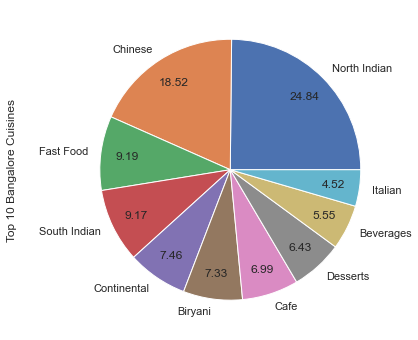

In [36]:
# Visualizing the top 10 most common cuisines in Bangalore.
sns.set()
plt.figure(figsize = (6,6))
cuisines.value_counts(ascending = False).head(10).plot(kind = 'pie', autopct = '%.2f', pctdistance = 0.8)
plt.ylabel('Top 10 Bangalore Cuisines', labelpad = 50)
plt.show()

- **Thus from the above plot we can see the top 10 Cuisines in Bangalore. It is visible that the "North Indian" cuisine is more prominant in zomato.**

> We could use the same methodology to deal with the missing values. However, the missing values only cover a tiny percentage of the total data, and the grouping would be larger since there are more than 100 different cuisines. 

It's safe to just fill the missing values with the most common cuisine which is North Indian.

In [37]:
# Filling the missing values.
df.loc[df['Cuisines'].isnull(), 'Cuisines'] = 'North Indian'
df['Cuisines'].isnull().sum()

0

#### FEATURE 6: Price
Description: The approximate Price of each Restaurant.

***This is the variable we want our ML model to predict based off the others.***

In [38]:
# Are there any missing values?
df['Price'].isnull().any()

True

- Inorder to overcome this issue we will replace all the NULL values with respect to their <u>Mean Price in the respective Location</u>.

In [39]:
# Locations where the Price is unknown.
df[df['Price'].isnull()]['Location'].unique()

array(['MG Road', 'Banaswadi', 'HSR', 'Koramangala 5th Block',
       'Kammanahalli', 'Koramangala 6th Block', 'Marathahalli',
       'Sarjapur Road', 'BTM', 'Varthur Main Road, Whitefield',
       'Residency Road', 'Indiranagar', 'Richmond Road', 'Lavelle Road',
       'Whitefield', 'Koramangala 7th Block', 'City Market',
       'Koramangala 8th Block', 'Bannerghatta Road', 'Old Airport Road',
       'Domlur', 'Frazer Town', 'RT Nagar', 'Jayanagar',
       'Basaveshwara Nagar', 'Hennur', 'Vijay Nagar', 'New BEL Road',
       'Kalyan Nagar', 'Malleshwaram', 'Yelahanka', 'Ejipura'],
      dtype=object)

In [40]:
# Total number of Locations where the Price is unknown.
df[df['Price'].isnull()]['Location'].nunique()

32

- We can see that out of the 90 Restaurants in Bangalore, 32 Restaurants have missing Price value in different locations.

In [41]:
df.index[:20]

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19,
            20],
           dtype='int64')

In [42]:
df.insert(0, '', range(0, 0 + len(df)))
df

,,Restaurant_Name,Online,Booking,Rating,Location,Cuisines,Price,Restaurant_Type
0,0,Fatso's,Yes,No,3.8,Brigade Road,"Cafe, American, Italian, Burger",650.0,Cafes
1,1,Biriyaniz,Yes,No,3.5,HSR,"Biryani, North Indian, Chinese, Andhra",400.0,Delivery
2,2,24@43 - The Oterra,No,Yes,4.1,Electronic City,"North Indian, Asian, Continental",3000.0,Dine-out
3,3,Upahara Bhavan,Yes,No,3.8,Bannerghatta Road,"South Indian, North Indian, Chinese",300.0,Delivery
4,4,Ross Kitchen,Yes,No,3.6,BTM,Chinese,400.0,Delivery
...,...,...,...,...,...,...,...,...,...
28439,22933,Al Sadique Restaurant,No,No,3.4,Frazer Town,"Mughlai, North Indian, Street Food",350.0,Dine-out
28440,22934,7 Plates,Yes,No,3.7,Koramangala 5th Block,"Mughlai, Fast Food",750.0,Delivery
28441,22935,Urban Tamaasha,Yes,Yes,4.1,Indiranagar,"North Indian, Chinese, Continental",1200.0,Delivery
28442,22936,Tewari Bros Mithai Shoppie,Yes,No,3.8,Commercial Street,"Fast Food, Mithai",300.0,Delivery


In [43]:
df.set_index('', inplace= True)
df.head()

,Restaurant_Name,Online,Booking,Rating,Location,Cuisines,Price,Restaurant_Type
,,,,,,,,
0,Fatso's,Yes,No,3.8,Brigade Road,"Cafe, American, Italian, Burger",650.0,Cafes
1,Biriyaniz,Yes,No,3.5,HSR,"Biryani, North Indian, Chinese, Andhra",400.0,Delivery
2,24@43 - The Oterra,No,Yes,4.1,Electronic City,"North Indian, Asian, Continental",3000.0,Dine-out
3,Upahara Bhavan,Yes,No,3.8,Bannerghatta Road,"South Indian, North Indian, Chinese",300.0,Delivery
4,Ross Kitchen,Yes,No,3.6,BTM,Chinese,400.0,Delivery


In [44]:
Places = df[df['Price'].isnull()]['Location'].unique()
for i in Places:
    print("Mean Price is : ", np.mean(df[df['Location'] == i]['Price']), f'for {i}')

Mean Price is :  1270.6496519721577 for MG Road
Mean Price is :  428.0 for Banaswadi
Mean Price is :  505.914362176628 for HSR
Mean Price is :  683.2683307332293 for Koramangala 5th Block
Mean Price is :  492.77777777777777 for Kammanahalli
Mean Price is :  617.8391959798995 for Koramangala 6th Block
Mean Price is :  565.0564617314931 for Marathahalli
Mean Price is :  621.3815789473684 for Sarjapur Road
Mean Price is :  422.0152091254753 for BTM
Mean Price is :  344.44444444444446 for Varthur Main Road, Whitefield
Mean Price is :  1040.3125 for Residency Road
Mean Price is :  682.8669950738916 for Indiranagar
Mean Price is :  884.9415204678363 for Richmond Road
Mean Price is :  1307.1984435797665 for Lavelle Road
Mean Price is :  681.7591499409681 for Whitefield
Mean Price is :  624.5283018867924 for Koramangala 7th Block
Mean Price is :  319.925 for City Market
Mean Price is :  386.283185840708 for Koramangala 8th Block
Mean Price is :  469.2640692640693 for Bannerghatta Road
Mean Pri

In [45]:
# Initially filling with 0.
df['Price'] = df['Price'].fillna(0)

In [46]:
# This loop assign these values to zero values according to the gender.
for i in range(0,22938):
    if(df['Price'][i] == 0):
        if(df['Location'][i] == 'MG Road'):
          df['Price'][i] = 1300
        elif(df['Location'][i] == 'Banaswadi'):
          df['Price'][i] = 450
        elif(df['Location'][i] == 'HSR'):
          df['Price'][i] = 500
        elif(df['Location'][i] == 'Koramangala 5th Block'):
          df['Price'][i] = 700
        elif(df['Location'][i] == 'Kammanahalli'):
          df['Price'][i] = 500
        elif(df['Location'][i] == 'Koramangala 6th Block'):
          df['Price'][i] = 600
        elif(df['Location'][i] == 'Marathahalli'):
          df['Price'][i] = 600
        elif(df['Location'][i] == 'Sarjapur Road'):
          df['Price'][i] = 600
        elif(df['Location'][i] == 'BTM'):
          df['Price'][i] = 400
        elif(df['Location'][i] == 'Varthur Main Road, Whitefield'):
          df['Price'][i] = 350
        elif(df['Location'][i] == 'Residency Road'):
          df['Price'][i] = 1050
        elif(df['Location'][i] == 'Indiranagar'):
          df['Price'][i] = 700
        elif(df['Location'][i] == 'Richmond Road'):
          df['Price'][i] = 900
        elif(df['Location'][i] == 'Lavelle Road'):
          df['Price'][i] = 1300
        elif(df['Location'][i] == 'Whitefield'):
          df['Price'][i] = 700
        elif(df['Location'][i] == 'Koramangala 7th Block'):
          df['Price'][i] = 600
        elif(df['Location'][i] == 'City Market'):
          df['Price'][i] = 300
        elif(df['Location'][i] == 'Koramangala 8th Block'):
          df['Price'][i] = 400
        elif(df['Location'][i] == 'Bannerghatta Road'):
          df['Price'][i] = 500
        elif(df['Location'][i] == 'Old Airport Road'):
          df['Price'][i] = 750
        elif(df['Location'][i] == 'Domlur'):
          df['Price'][i] = 650
        elif(df['Location'][i] == 'Frazer Town'):
          df['Price'][i] = 500
        elif(df['Location'][i] == 'RT Nagar'):
          df['Price'][i] = 400
        elif(df['Location'][i] == 'Jayanagar'):
          df['Price'][i] = 500
        elif(df['Location'][i] == 'Basaveshwara Nagar'):
          df['Price'][i] = 500
        elif(df['Location'][i] == 'Hennur'):
          df['Price'][i] = 400
        elif(df['Location'][i] == 'Vijay Nagar'):
          df['Price'][i] = 400
        elif(df['Location'][i] == 'New BEL Road'):
          df['Price'][i] = 500
        elif(df['Location'][i] == 'Kalyan Nagar'):
          df['Price'][i] = 600
        elif(df['Location'][i] == 'Malleshwaram'):
          df['Price'][i] = 600
        elif(df['Location'][i] == 'Yelahanka'):
          df['Price'][i] = 300
        elif(df['Location'][i] == 'Ejipura'):
          df['Price'][i] = 350
        else:
          df['Price'][i] = df['Price'][i]
    else:
      continue      

In [47]:
# Are there any missing values?
df['Price'].isnull().any()

False

In [48]:
df.to_csv('cleaned_data.csv', index= False)